In [2]:
from statsmodels.tsa.stattools import acf as sm_acf, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# NOMOR 2

In [3]:
# build the dataframe from the provided series
df = pd.DataFrame({
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '(z_t)': [95, 102, 98, 105, 112, 110, 118, 120, 125, 123]
})

In [4]:
df

,t,(z_t)
0,1,95
1,2,102
2,3,98
3,4,105
4,5,112
5,6,110
6,7,118
7,8,120
8,9,125
9,10,123


Text(0, 0.5, '(z_t)')

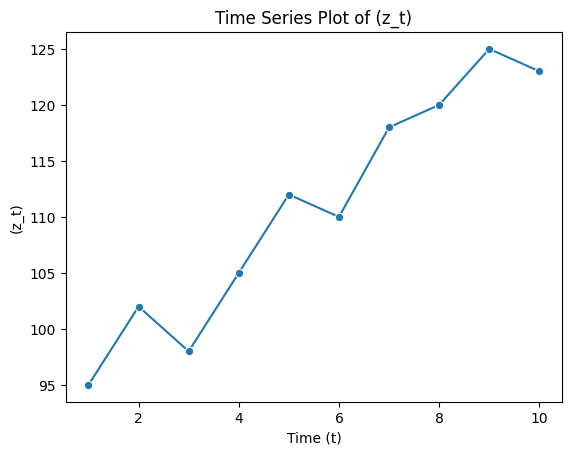

In [6]:
sns.lineplot(data=df, x='t', y='(z_t)', marker='o')
plt.title('Time Series Plot of (z_t)')
plt.xlabel('Time (t)')
plt.ylabel('(z_t)')

In [7]:
df['log_z_t'] = np.log(df['(z_t)'])
df['diff_log_z_t'] = df['log_z_t'].diff()

In [8]:
df

,t,(z_t),log_z_t,diff_log_z_t
0,1,95,4.553877,NaN
1,2,102,4.624973,0.071096
2,3,98,4.584967,-0.040005
3,4,105,4.653960,0.068993
4,5,112,4.718499,0.064539
5,6,110,4.700480,-0.018019
6,7,118,4.770685,0.070204
7,8,120,4.787492,0.016807
8,9,125,4.828314,0.040822
9,10,123,4.812184,-0.016129


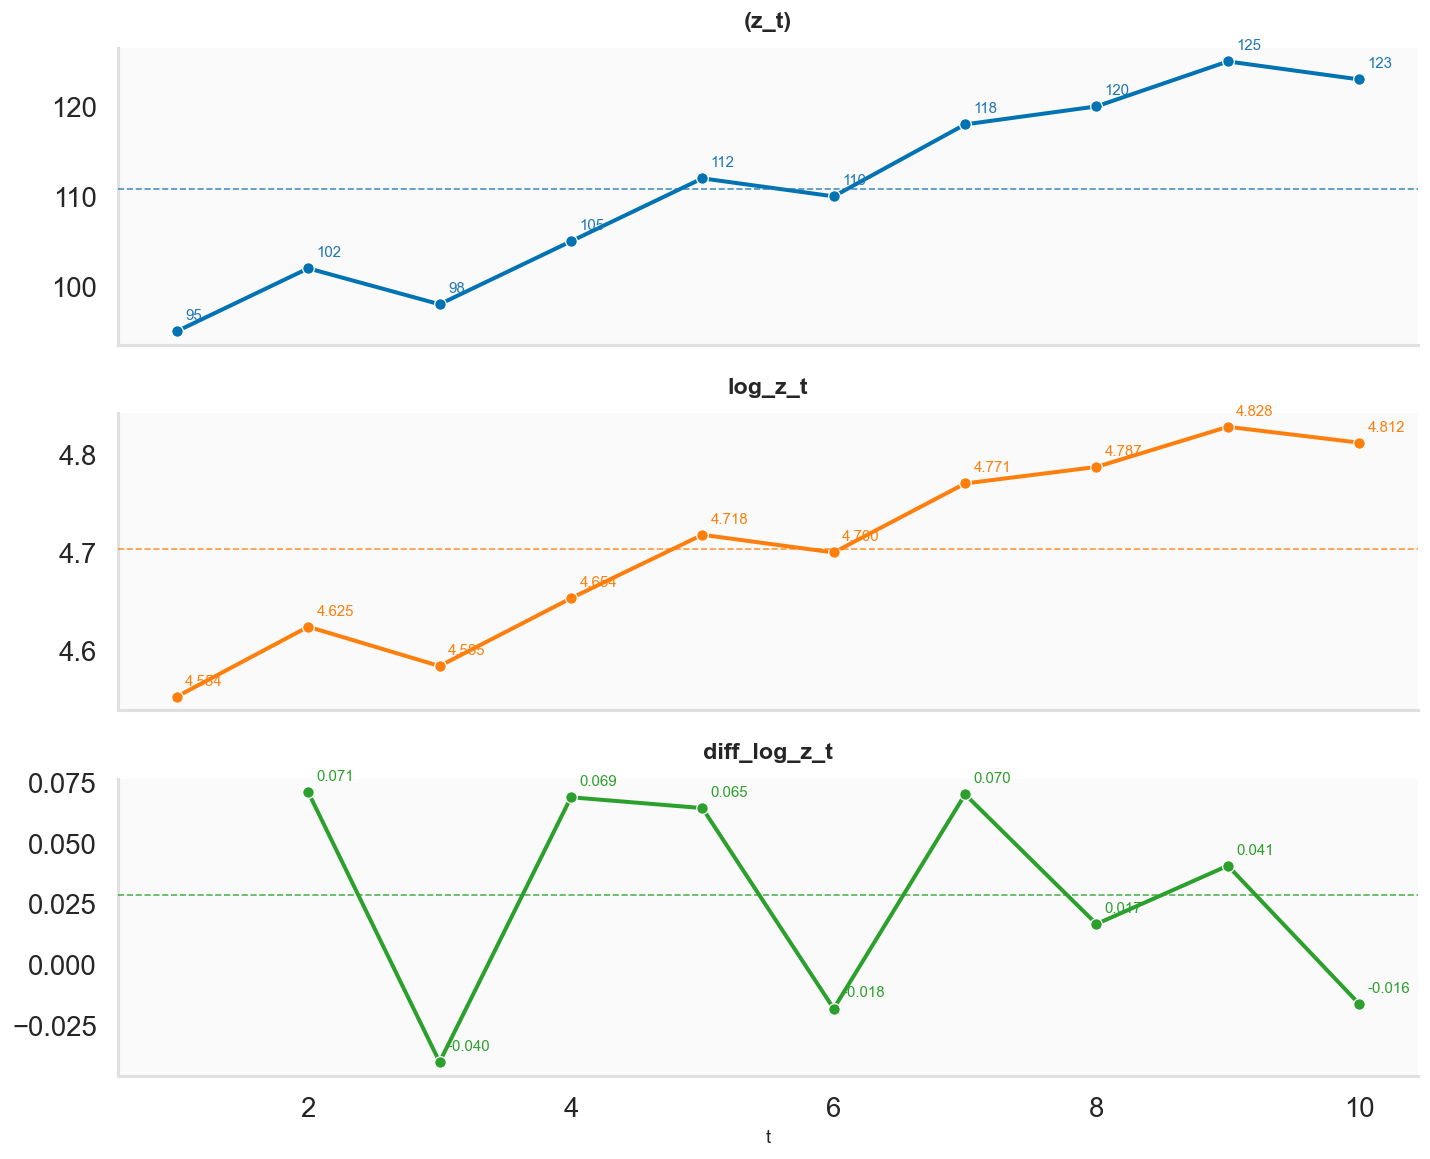

In [21]:
fig2, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# berikan label untuk tiap data point
for _, r in df.iterrows():
    axes[0].annotate(f'{int(r["(z_t)"])}', (r['t'], r['(z_t)']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:blue', zorder=15)

for _, r in df.iterrows():
    axes[1].annotate(f'{r["log_z_t"]:.3f}', (r['t'], r['log_z_t']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:orange', zorder=15)

for _, r in df.dropna(subset=['diff_log_z_t']).iterrows():
    axes[2].annotate(f'{r["diff_log_z_t"]:.3f}', (r['t'], r['diff_log_z_t']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:green', zorder=15)

# tambahkan garis mean pada tiap subplot
axes[0].axhline(df['(z_t)'].mean(), color='tab:blue', linestyle='--', linewidth=1, alpha=0.8, zorder=10)
axes[1].axhline(df['log_z_t'].mean(), color='tab:orange', linestyle='--', linewidth=1, alpha=0.8, zorder=10)
axes[2].axhline(df['diff_log_z_t'].mean(), color='tab:green', linestyle='--', linewidth=1, alpha=0.8, zorder=10)

sns.lineplot(ax=axes[0], data=df, x='t', y='(z_t)', marker='o')
axes[0].set_title('(z_t)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].grid(False)

sns.lineplot(ax=axes[1], data=df, x='t', y='log_z_t', marker='o', color='tab:orange')
axes[1].set_title('log_z_t')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].grid(False)

sns.lineplot(ax=axes[2], data=df.dropna(subset=['diff_log_z_t']), x='t', y='diff_log_z_t', marker='o', color='tab:green')
axes[2].set_title('diff_log_z_t')
axes[2].set_xlabel('t')
axes[2].set_ylabel('')
axes[2].grid(False)


plt.tight_layout()
plt.show()

# Nomor 3

In [25]:
# build a new dataframe from the provided values
df2 = pd.DataFrame({
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'z_t': [80, 50, 40, 50, 80, 90, 50, 30, 50, 80]
})

In [40]:
list(df2['z_t'][1:])

[50, 40, 50, 80, 90, 50, 30, 50, 80]

In [54]:
df2['z_t_lag1'] = [None] + list(df2['z_t'][1:])

for i in range(len(df2)):
    if df2['t'].iloc[i] == 1:
        df2['z_t_lag1'].iloc[i] = None
    else:
        df2['z_t_lag1'].iloc[i] = df2['z_t'].iloc[i-1]

In [56]:
df2['forecast'] = np.nan
for i in range(len(df2)):
    if df2['t'].iloc[i] == 1:
        df2['forecast'].iloc[i] = df2['z_t'].iloc[i]
    else:
        df2['forecast'].iloc[i] = df2['z_t'].iloc[i] + 0.5 * df2['z_t_lag1'].iloc[i]

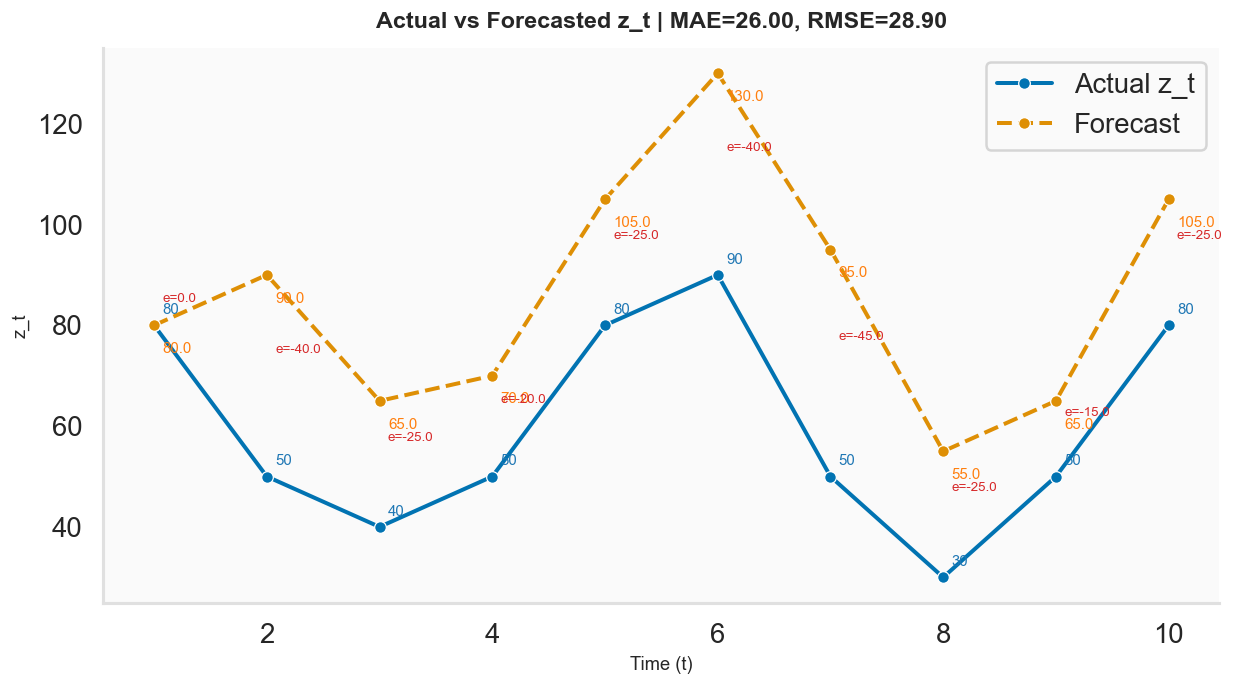

In [63]:
sns.lineplot(data=df2, x='t', y='z_t', marker='o', label='Actual z_t')
sns.lineplot(data=df2, x='t', y='forecast', marker='o', label='Forecast', linestyle='--')

# hitung error dan metrik ringkas
df2['error'] = df2['z_t'] - df2['forecast']
mae = df2['error'].abs().mean()
rmse = np.sqrt((df2['error'] ** 2).mean())

# anotasi nilai error per titik
for _, r in df2.iterrows():
    plt.annotate(f'e={r["error"]:.1f}', (r['t'], (r['z_t'] + r['forecast']) / 2),
                 textcoords='offset points', xytext=(5, 12),
                 ha='left', va='bottom', fontsize=8, color='tab:red', zorder=16)

plt.title(f'Actual vs Forecasted z_t | MAE={mae:.2f}, RMSE={rmse:.2f}')

# label each actual point
for _, row in df2.iterrows():
    plt.annotate(f'{int(row["z_t"])}', (row['t'], row['z_t']),
                 textcoords='offset points', xytext=(5, 5),
                 ha='left', va='bottom', fontsize=9, color='tab:blue')

# label each forecast point
for _, row in df2.iterrows():
    plt.annotate(f'{row["forecast"]:.1f}', (row['t'], row['forecast']),
                 textcoords='offset points', xytext=(5, -10),
                 ha='left', va='top', fontsize=9, color='tab:orange')
plt.xlabel('Time (t)')
plt.ylabel('z_t')
plt.legend()
plt.grid(False)
plt.show()

In [64]:
df2

,t,z_t,z_t_lag1,forecast,error
0,1,80,NaN,80.0,0.0
1,2,50,80.0,90.0,-40.0
2,3,40,50.0,65.0,-25.0
3,4,50,40.0,70.0,-20.0
4,5,80,50.0,105.0,-25.0
5,6,90,80.0,130.0,-40.0
6,7,50,90.0,95.0,-45.0
7,8,30,50.0,55.0,-25.0
8,9,50,30.0,65.0,-15.0
9,10,80,50.0,105.0,-25.0


In [65]:
df2['error_squared'] = df2['error'] ** 2
df2['abs_error'] = df2['error'].abs()

In [66]:
df2

,t,z_t,z_t_lag1,forecast,error,error_squared,abs_error
0,1,80,NaN,80.0,0.0,0.0,0.0
1,2,50,80.0,90.0,-40.0,1600.0,40.0
2,3,40,50.0,65.0,-25.0,625.0,25.0
3,4,50,40.0,70.0,-20.0,400.0,20.0
4,5,80,50.0,105.0,-25.0,625.0,25.0
5,6,90,80.0,130.0,-40.0,1600.0,40.0
6,7,50,90.0,95.0,-45.0,2025.0,45.0
7,8,30,50.0,55.0,-25.0,625.0,25.0
8,9,50,30.0,65.0,-15.0,225.0,15.0
9,10,80,50.0,105.0,-25.0,625.0,25.0


In [80]:
rmse=np.sqrt(df2['error_squared'][1:].mean())

In [81]:
rmse

30.459444804161777

In [76]:
mape=(df2['abs_error'][1:] / df2['z_t'][1:]) * 100

In [78]:
mape

1    80.000000
2    62.500000
3    40.000000
4    31.250000
5    44.444444
6    90.000000
7    83.333333
8    30.000000
9    31.250000
dtype: float64

In [77]:
mape.mean()

54.75308641975309

# Nomor 3 Revisi

In [4]:
# build a new dataframe from the provided values
df = pd.DataFrame({
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'z_t': [80, 50, 40, 50, 80, 90, 50, 30, 50, 80]
})

In [7]:
df['mean_z_t'] = df['z_t'].mean().astype(int)
df['z_t_bar'] = df['z_t'] - df['mean_z_t'].astype(int)
df['z_t_bar-1'] = df['z_t_bar'].shift(1)
df['forecast_z_t_bar']= (df['z_t_bar-1']*0.5)
df['at']=df['z_t_bar'] - df['forecast_z_t_bar']
df['at^2']=df['at']**2
df['at_abs']=abs(df['at'])
df['sum_at^2']=df['at^2'].sum()
df['at_abs/z_t']=df['at_abs']/df['z_t']
df['RMSE']=np.sqrt(df['sum_at^2']/(len(df)-2))
df['MAPE']=(df['at_abs']/df['z_t']).mean()*100

In [8]:
df

,t,z_t,mean_z_t,z_t_bar,z_t_bar-1,forecast_z_t_bar,at,at^2,at_abs,sum_at^2,at_abs/z_t,RMSE,MAPE
0,1,80,60,20,NaN,NaN,NaN,NaN,NaN,3550.0,NaN,21.065374,33.950617
1,2,50,60,-10,20.0,10.0,-20.0,400.0,20.0,3550.0,0.400000,21.065374,33.950617
2,3,40,60,-20,-10.0,-5.0,-15.0,225.0,15.0,3550.0,0.375000,21.065374,33.950617
3,4,50,60,-10,-20.0,-10.0,0.0,0.0,0.0,3550.0,0.000000,21.065374,33.950617
4,5,80,60,20,-10.0,-5.0,25.0,625.0,25.0,3550.0,0.312500,21.065374,33.950617
5,6,90,60,30,20.0,10.0,20.0,400.0,20.0,3550.0,0.222222,21.065374,33.950617
6,7,50,60,-10,30.0,15.0,-25.0,625.0,25.0,3550.0,0.500000,21.065374,33.950617
7,8,30,60,-30,-10.0,-5.0,-25.0,625.0,25.0,3550.0,0.833333,21.065374,33.950617
8,9,50,60,-10,-30.0,-15.0,5.0,25.0,5.0,3550.0,0.100000,21.065374,33.950617
9,10,80,60,20,-10.0,-5.0,25.0,625.0,25.0,3550.0,0.312500,21.065374,33.950617


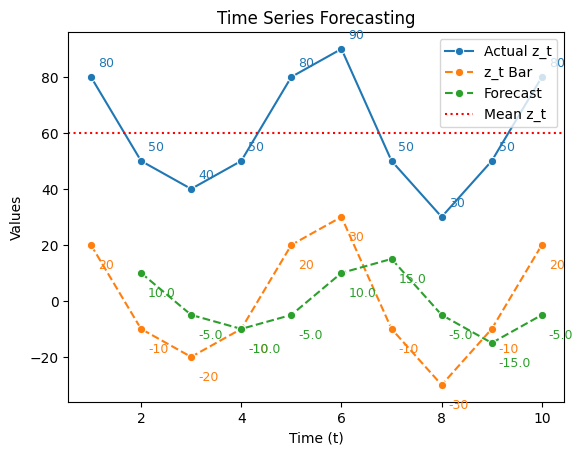

In [9]:
sns.lineplot(data=df, x='t', y='z_t', marker='o', label='Actual z_t')
sns.lineplot(data=df, x='t', y='z_t_bar', marker='o', label='z_t Bar', linestyle='--')
sns.lineplot(data=df, x='t', y='forecast_z_t_bar', marker='o', label='Forecast', linestyle='--')
plt.axhline(y=df['mean_z_t'][0], color='r', linestyle=':', label='Mean z_t')
plt.title('Time Series Forecasting')
plt.xlabel('Time (t)')
plt.ylabel('Values')


# label each actual point
for _, row in df.iterrows():
    plt.annotate(f'{int(row["z_t"])}', (row['t'], row['z_t']),
                 textcoords='offset points', xytext=(5, 5),
                 ha='left', va='bottom', fontsize=9, color='tab:blue')
    
# label each z_t_bar point
for _, row in df.iterrows():
    plt.annotate(f'{int(row["z_t_bar"])}', (row['t'], row['z_t_bar']),
                 textcoords='offset points', xytext=(5, -10),
                 ha='left', va='top', fontsize=9, color='tab:orange')

# label each forecast point
for _, row in df.iterrows():
    plt.annotate(f'{row["forecast_z_t_bar"]:.1f}', (row['t'], row['forecast_z_t_bar']),
                 textcoords='offset points', xytext=(5, -10),
                 ha='left', va='top', fontsize=9, color='tab:green')
plt.legend()
plt.show()